In [15]:
%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

from scipy import stats
import warnings
from itertools import product

Populating the interactive namespace from numpy and matplotlib


*Возьмем выборку нефть-brent-2010-2019.csv*

In [16]:
data = pd.read_csv('нефть-brent-2010-2019.csv', index_col=[0], parse_dates=[0])
data.head()

,value
date,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


Применим `.describe()`, чтобы посмотреть статистику

In [17]:
data.describe()

,value
count,2667.000000
mean,81.533547
std,26.349469
min,27.850000
25%,56.840000
50%,77.710000
75%,108.190000
max,126.900000


`describe()` показывает ряд полезных показателей, в том числе:
`count` - количество записей, `mean` - среднее значение, `std` - стандартное отклонение, указывающее на разброс данных по среднему значению, `min` - минимальное значение в наборе, `max` - максимальное значение в наборе вместе с диапазоном процентов. Процентили могут помочь нам понять распределение вероятностей наших данных.

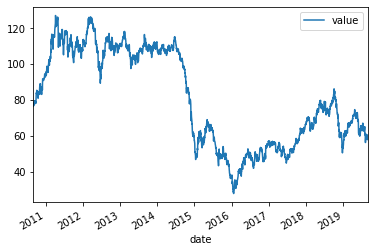

In [18]:
data.plot()

Ряд не стационарен из за тренда, дальше рассмотрим его отдельные составляющие. 

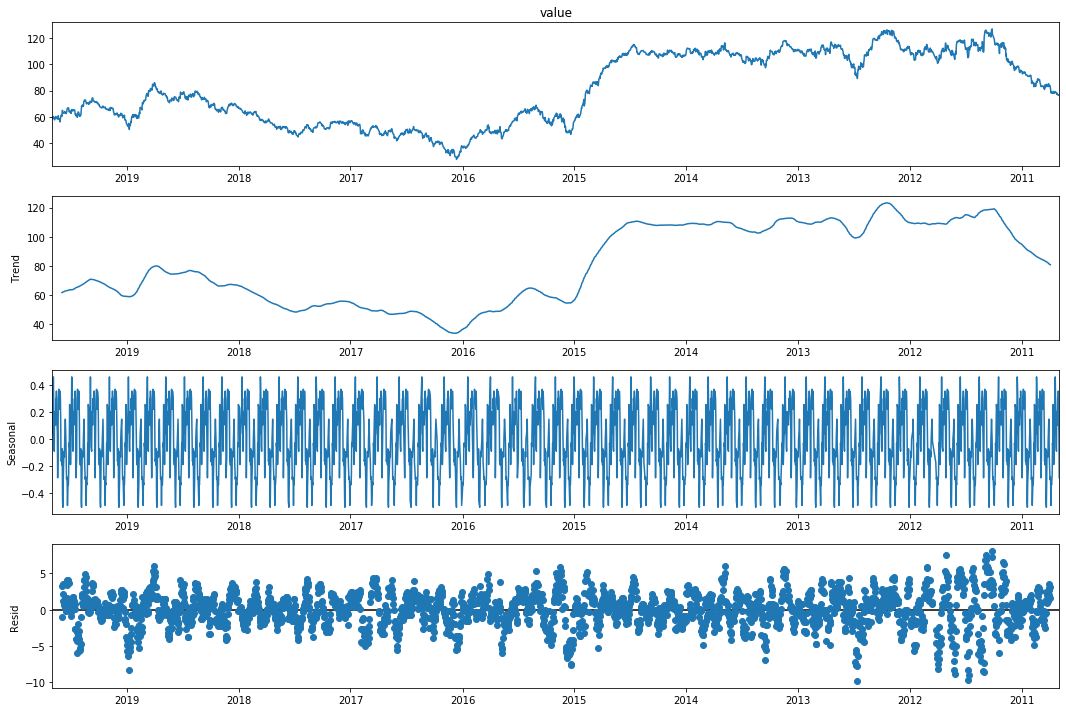

<Figure size 1080x720 with 0 Axes>

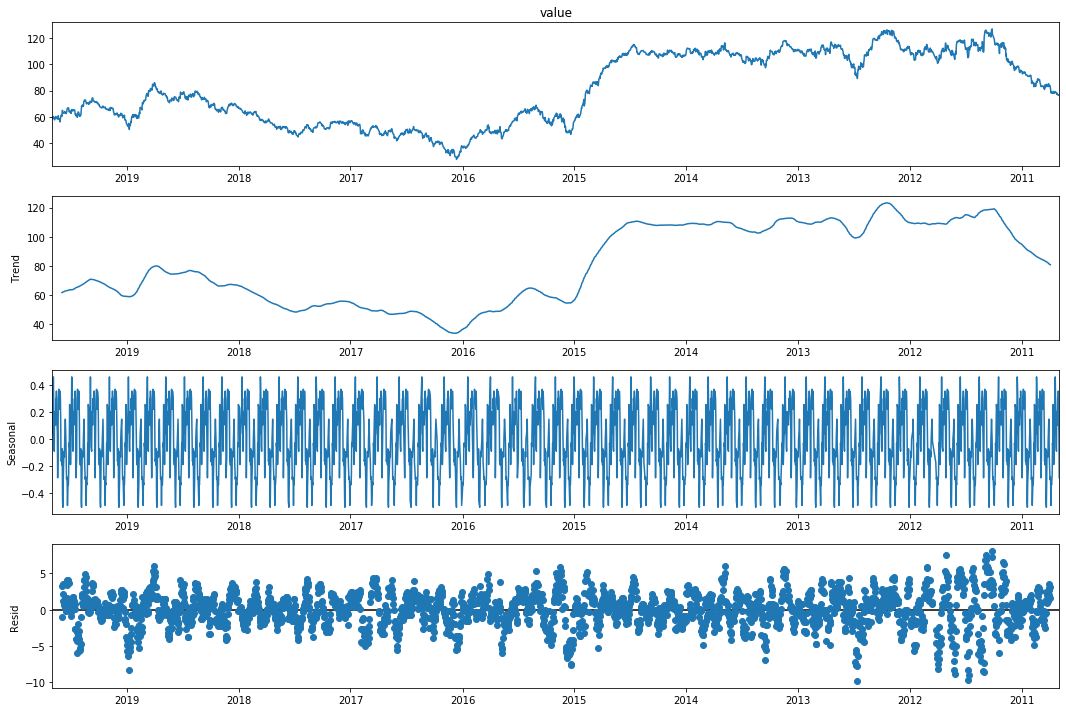

In [19]:
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(data.value, freq=52).plot()

На графиках видно, что ряд нестационарен из за сезонности и тренда.

In [21]:
data_m = data.resample('MS').mean()
data_m.tail()

,value
date,
2019-05-01,69.966667
2019-06-01,62.980400
2019-07-01,64.292963
2019-08-01,59.263077
2019-09-01,58.840000


Сделали ресемплинг по месяцам

## ARIMA

`ARIMA` stands for Auto-Regressive Integrated Moving Average. There are three integers `(p, d, q)` that are used to parametrize ARIMA models. Because of that, a nonseasonal ARIMA model is denoted with `ARIMA(p, d, q)`:

$statsmodels.tsa.statespace.sarimax.SARIMAXResults$ returns values for AIC (Akaike Information Criterion) and BIC (Bayes Information Criterion) that can be minimized to select the best fitting model. We use the AIC value, which estimates the information lost when a given model is used to represent the process that generates the data. In doing so, it deals with the trade-off between the goodness of fit of the model and the complexity of the model itself.

In [22]:
import warnings
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [23]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_m,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1267.823602907197
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1037.099502283224
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:859.8637631111692
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:756.9219887219659
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:860.1066570687592
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:848.6112628967935
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:766.1328929711766
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:758.851808865211
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1116.9895536618978
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:906.0404212249762
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:749.1660630222201
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:661.1103133018206
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:758.893579170625
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:740.9202995116539
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:675.839088538138
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:662.6222024663368
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:663.7534387012972
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:585.1550115140361
ARIMA(0, 1, 

Вывод нашего кода предполагает, что `SARIMAX(1, 1, 1)x(1, 1, 1, 12)`дает самое низкое `AIC`значение 518.93. Поэтому мы должны считать это оптимальным вариантом из всех рассмотренных нами моделей.

Начнем с добавления оптимальных значений параметров в новую `SARIMAX` модель:

In [24]:
mod = sm.tsa.statespace.SARIMAX(data_m,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1561      0.220      0.709      0.479      -0.276       0.588
ma.L1          0.2817      0.234      1.204      0.229      -0.177       0.740
ar.S.L12       0.0016      0.008      0.201      0.841      -0.014       0.017
ma.S.L12      -0.8099      0.175     -4.627      0.000      -1.153      -0.467
sigma2        26.8519      5.118      5.246      0.000      16.820      36.884


`summary`Атрибут , который является результатом вывода `SARIMAX`возвращает значительное количество информации, но мы сосредоточим наше внимание на таблицу коэффициентов. В `coef`столбце отображается вес (т.е. важность) каждый признак и как каждый из которых влияют на временные ряды. `P>|z|`Колонна сообщает нам о значении каждого веса признака. Здесь каждый вес имеет значение `p` ниже или близко к нему 0.5, поэтому разумно сохранить их все в нашей модели.

При подборе сезонных моделей ARIMA (и любых других моделей по этому вопросу) важно проводить диагностику модели, чтобы убедиться, что ни одно из допущений, сделанных моделью, не было нарушено. `plot_diagnostics`Объект позволяет быстро создавать модели диагностики и исследования для любого необычного поведения.

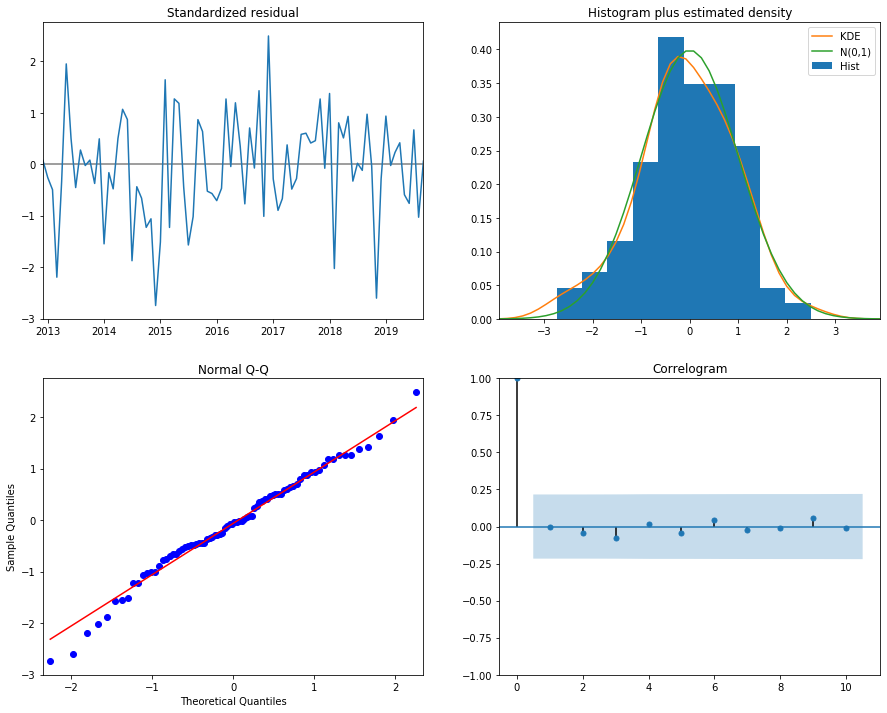

In [25]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Наша главная задача - обеспечить, чтобы остатки нашей модели были `некоррелированными` и `нормально распределенными с нулевым средним`. Если сезонная модель `ARIMA` не удовлетворяет этим свойствам, это является хорошим показателем того, что ее можно еще улучшить.

В этом случае наша диагностика модели предполагает, что остатки модели обычно распределяются на основе следующего:

1. На верхнем правом графике мы видим, что красная `KDE`линия близко следует за `N(0,1)`линией (где `N(0,1)`) - стандартное обозначение для нормального распределения со средним `0` и стандартным отклонением `1`). Это хороший признак того, что остатки обычно распределяются.
2. Участок в левом нижнем углу показывает, что упорядоченное распределение остатков (синие точки) почти следует линейный тренд из образцов , взятых из стандартного нормального распределения с `N(0, 1)`. Опять же, это убедительный признак того, что остатки обычно распределяются.
3. Остатки во времени (верхний левый график) не показывают явной сезонности и кажутся белым шумом. Это подтверждается графиком автокорреляции (т.е. коррелограммы) в правом нижнем углу, который показывает, что остатки временного ряда имеют низкую корреляцию с запаздывающими версиями самого себя.

Эти наблюдения позволяют нам сделать вывод, что наша модель обеспечивает удовлетворительное соответствие, которое может помочь нам понять данные нашего временного ряда и прогнозировать будущие значения.